In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from synthetic import simulate_lorenz_96
from models.clstm import cLSTM, train_model_ista

In [2]:
# For GPU acceleration
device = torch.device('cuda')

In [3]:
# Simulate data
X_np, GC = simulate_lorenz_96(p=10, F=10, T=1000)
X = torch.tensor(X_np[np.newaxis], dtype=torch.float32, device=device)

In [4]:
# Set up model
clstm = cLSTM(X.shape[-1], hidden=100).cuda(device=device)

In [5]:
# Train with ISTA
train_loss_list = train_model_ista(
    clstm, X, context=10, lam=10.0, lam_ridge=1e-2, lr=1e-3, max_iter=20000,
    check_every=50)

----------Iter = 50----------
Loss = 86.421143
Variable usage = 100.00%
----------Iter = 100----------
Loss = 37.897102
Variable usage = 100.00%
----------Iter = 150----------
Loss = 21.778318
Variable usage = 22.00%
----------Iter = 200----------
Loss = 20.419668
Variable usage = 17.00%
----------Iter = 250----------
Loss = 19.608578
Variable usage = 15.00%
----------Iter = 300----------
Loss = 19.059374
Variable usage = 14.00%
----------Iter = 350----------
Loss = 18.654160
Variable usage = 14.00%
----------Iter = 400----------
Loss = 18.330179
Variable usage = 17.00%
----------Iter = 450----------
Loss = 18.048361
Variable usage = 20.00%
----------Iter = 500----------
Loss = 17.787611
Variable usage = 25.00%
----------Iter = 550----------
Loss = 17.538431
Variable usage = 26.00%
----------Iter = 600----------
Loss = 17.296713
Variable usage = 28.00%
----------Iter = 650----------
Loss = 17.061043
Variable usage = 28.00%
----------Iter = 700----------
Loss = 16.831450
Variable usage 

----------Iter = 5700----------
Loss = 8.906846
Variable usage = 36.00%
----------Iter = 5750----------
Loss = 8.878749
Variable usage = 36.00%
----------Iter = 5800----------
Loss = 8.879649
Variable usage = 39.00%
----------Iter = 5850----------
Loss = 8.925125
Variable usage = 40.00%
----------Iter = 5900----------
Loss = 8.855410
Variable usage = 40.00%
----------Iter = 5950----------
Loss = 8.775022
Variable usage = 36.00%
----------Iter = 6000----------
Loss = 8.759206
Variable usage = 37.00%
----------Iter = 6050----------
Loss = 8.724965
Variable usage = 36.00%
----------Iter = 6100----------
Loss = 8.700897
Variable usage = 36.00%
----------Iter = 6150----------
Loss = 8.829200
Variable usage = 40.00%
----------Iter = 6200----------
Loss = 8.651069
Variable usage = 36.00%
----------Iter = 6250----------
Loss = 8.636288
Variable usage = 37.00%
----------Iter = 6300----------
Loss = 8.604856
Variable usage = 36.00%
----------Iter = 6350----------
Loss = 8.580739
Variable usage =

----------Iter = 11400----------
Loss = 7.272131
Variable usage = 42.00%
----------Iter = 11450----------
Loss = 7.263319
Variable usage = 41.00%
----------Iter = 11500----------
Loss = 7.295763
Variable usage = 43.00%
----------Iter = 11550----------
Loss = 7.249273
Variable usage = 41.00%
----------Iter = 11600----------
Loss = 7.240758
Variable usage = 42.00%
----------Iter = 11650----------
Loss = 7.232651
Variable usage = 42.00%
----------Iter = 11700----------
Loss = 7.246358
Variable usage = 43.00%
----------Iter = 11750----------
Loss = 7.223718
Variable usage = 42.00%
----------Iter = 11800----------
Loss = 7.847873
Variable usage = 46.00%
----------Iter = 11850----------
Loss = 7.213636
Variable usage = 42.00%
----------Iter = 11900----------
Loss = 7.205957
Variable usage = 41.00%
----------Iter = 11950----------
Loss = 7.333447
Variable usage = 44.00%
----------Iter = 12000----------
Loss = 7.192358
Variable usage = 42.00%
----------Iter = 12050----------
Loss = 7.184646
Va

In [6]:
GC_est = clstm.GC(threshold = False).cpu().data.numpy()
GC_est

array([[1.9563979e-01, 1.9245919e-02, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        8.9022797e-03, 5.0600790e-03],
       [8.0778552e-03, 2.0287749e-01, 2.0577677e-02, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.0254933e-02],
       [9.2523154e-03, 9.3459105e-03, 2.0593229e-01, 1.4302975e-02,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 7.6498548e-03, 3.7491864e-03, 2.0182577e-01,
        1.3488876e-02, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 7.5873300e-03, 2.6946084e-03,
        2.1491365e-01, 1.4539867e-02, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 2.7184376e-05, 0.0000000e+00, 9.1650523e-03,
        0.0000000e+00, 2.1103378e-01, 1.6637022e-02, 0.00

True variable usage = 40.00%
Estimated variable usage = 41.00%
Accuracy = 97.00%


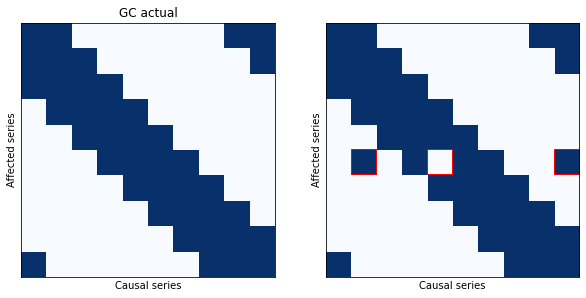

In [7]:
# Check learned Granger causality
GC_est = clstm.GC().cpu().data.numpy()

print('True variable usage = %.2f%%' % (100 * np.mean(GC)))
print('Estimated variable usage = %.2f%%' % (100 * np.mean(GC_est)))
print('Accuracy = %.2f%%' % (100 * np.mean(GC == GC_est)))

# Make figures
fig, axarr = plt.subplots(1, 2, figsize=(10, 5))
axarr[0].imshow(GC, cmap='Blues')
axarr[0].set_title('GC actual')
axarr[0].set_ylabel('Affected series')
axarr[0].set_xlabel('Causal series')
axarr[0].set_xticks([])
axarr[0].set_yticks([])

axarr[1].imshow(GC_est, cmap='Blues', vmin=0, vmax=1, extent=(0, len(GC_est), len(GC_est), 0))
axarr[1].set_ylabel('Affected series')
axarr[1].set_xlabel('Causal series')
axarr[1].set_xticks([])
axarr[1].set_yticks([])

# Mark disagreements
for i in range(len(GC_est)):
    for j in range(len(GC_est)):
        if GC[i, j] != GC_est[i, j]:
            rect = plt.Rectangle((j, i-0.05), 1, 1, facecolor='none', edgecolor='red', linewidth=1)
            axarr[1].add_patch(rect)

plt.show()